In [6]:
library(tidyr)
library(dplyr)
library(readr)
library(basetheme)
library(phangorn)
library(ape)
library(ade4)
library(ggtree)
library(colorspace)
library(adegenet)
library(dendextend)
library(circlize)
library(ggplot2)

In [80]:
chm13 = read.csv('/home/jbazanwilliamson/data/chm13_gene_regions.csv')
anotation = read.csv("../data/SGDP_anotation.csv")

#ids_hg19 = data.frame()
Sample = anotation['X3.Illumina_ID']
Region = anotation['X10.Region']
Country = anotation['X11.Country']
anotation

Warning message in FUN(X[[i]], ...):
“input string 8 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 8 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 8 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 8 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 8 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 8 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 8 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 8 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 8 is invalid in this locale”
ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): input string 8 is invalid in this locale

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mi

X2.ena_id,X3.Illumina_ID,X4.reich_id,X5.ena_ftp_bam_ptr,X6.Sequencing_Panel,X7.Gender,X8.Population_ID,X9.Contributor,X10.Region,X11.Country,X12.Town,X13.Latitude,X14.Longitude,X15.DNA_Source,X16.BioSamples.Accession,X17.Embargo
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
SAMEA3302859,LP6005443-DNA_B06,S_Icelandic-2,ftp.sra.ebi.ac.uk/vol1/ERZ324/ERZ324295/LP6005443-DNA_B06.srt.aln.bam,C,F,Icelandic,Coriell,WestEurasia,Iceland,Cell_line_repository_sampling_location_unknown,64.10000,-21.900,Genomic_from_cell_lines,SAMEA3302859,FullyPublic
SAMEA3302837,LP6005442-DNA_D08,S_Icelandic-1,ftp.sra.ebi.ac.uk/vol1/ERZ125/ERZ125657/srt.aln.bam,C,F,Icelandic,Coriell,WestEurasia,Iceland,Cell_line_repository_sampling_location_unknown,64.10000,-21.900,Genomic_from_cell_lines,SAMEA3302837,FullyPublic
SAMEA3302616,LP6005441-DNA_D07,S_Makrani-2,ftp.sra.ebi.ac.uk/vol1/ERZ324/ERZ324870/LP6005441-DNA_D07.srt.aln.bam,C,F,Makrani,Howard Cann,SouthAsia,Pakistan,?,26.00000,64.000,Genomic_from_cell_lines,SAMEA3302616,FullyPublic
SAMEA3302771,LP6005441-DNA_C07,S_Makrani-1,ftp.sra.ebi.ac.uk/vol1/ERZ312/ERZ312785/LP6005441-DNA_C07.srt.aln.bam,C,M,Makrani,Howard Cann,SouthAsia,Pakistan,?,26.00000,64.000,Genomic_from_cell_lines,SAMEA3302771,FullyPublic
SAMEA3302647,LP6005442-DNA_G11,S_Mende-1,ftp.sra.ebi.ac.uk/vol1/ERZ324/ERZ324275/LP6005442-DNA_G11.srt.aln.bam,C,M,Mende,1KG,Africa,SierraLeone,?,8.50000,-13.200,Genomic_from_cell_lines,SAMEA3302647,FullyPublic
SAMEA3302748,LP6005442-DNA_H11,S_Mende-2,ftp.sra.ebi.ac.uk/vol1/ERZ324/ERZ324282/LP6005442-DNA_H11.srt.aln.bam,C,F,Mende,1KG,Africa,SierraLeone,?,8.50000,-13.200,Genomic_from_cell_lines,SAMEA3302748,FullyPublic
SAMEA3302764,LP6005442-DNA_F12,S_Tubalar-1,ftp.sra.ebi.ac.uk/vol1/ERZ324/ERZ324267/LP6005442-DNA_F12.srt.aln.bam,C,F,Tubalar,Rem Sukernik / Stanislav Dryomov,CentralAsiaSiberia,Russia,"Artybash and Kebezen, Altai-Sayan Upland",51.13333,87.000,Genomic_from_blood,SAMEA3302764,FullyPublic
SAMEA3302781,LP6005442-DNA_E12,S_Tubalar-2,ftp.sra.ebi.ac.uk/vol1/ERZ324/ERZ324260/LP6005442-DNA_E12.srt.aln.bam,C,F,Tubalar,Rem Sukernik / Stanislav Dryomov,CentralAsiaSiberia,Russia,"Artybash and Kebezen, Altai-Sayan Upland",51.13333,87.000,Genomic_from_blood,SAMEA3302781,FullyPublic
SAMEA3302703,LP6005442-DNA_G12,S_Ulchi-2,ftp.sra.ebi.ac.uk/vol1/ERZ324/ERZ324276/LP6005442-DNA_G12.srt.aln.bam,C,F,Ulchi,Rem Sukernik / Stanislav Dryomov,CentralAsiaSiberia,Russia,"Bogorodskoe, Lower Amur",52.37000,140.450,Genomic_from_blood,SAMEA3302703,FullyPublic


In [81]:
chm13['LENGHT'] = chm13['END'] - chm13['START']
drop <- c('START_GENE', 'END_GENE', 'X')
chm13 = chm13[,!(names(chm13) %in% drop)]

#chm13 = chm13.drop_duplicates()
#unique(chm13)
chm13 = chm13[!duplicated(chm13), ]#['TYPE'].value_counts()
#colnames(chm13)

chm13

,SAMPLE,CHR,START,END,SCORE,TYPE,LENGHT
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>
1,LP6005441-DNA_B02,chrX,105118,116978,1,DELETION,11860
19,LP6005441-DNA_B02,chrX,1038532,1048096,1,DELETION,9564
22,LP6005441-DNA_B02,chrX,1193541,1202443,1,DELETION,8902
25,LP6005441-DNA_B02,chrX,1296349,1304923,1,DELETION,8574
27,LP6005441-DNA_B02,chrX,1855267,1863572,1,DELETION,8305
29,LP6005441-DNA_B02,chrX,17890245,17900615,1,DELETION,10370
30,LP6005441-DNA_B02,chrX,46408482,46421759,1,DELETION,13277
34,LP6005441-DNA_B02,chrX,46567303,46579167,1,DELETION,11864
38,LP6005441-DNA_B02,chrX,47953825,47964350,1,DELETION,10525


In [82]:
ids_hg19 = data.frame(Sample,Region,Country)
ids_hg19

X3.Illumina_ID,X10.Region,X11.Country
<chr>,<chr>,<chr>
LP6005443-DNA_B06,WestEurasia,Iceland
LP6005442-DNA_D08,WestEurasia,Iceland
LP6005441-DNA_D07,SouthAsia,Pakistan
LP6005441-DNA_C07,SouthAsia,Pakistan
LP6005442-DNA_G11,Africa,SierraLeone
LP6005442-DNA_H11,Africa,SierraLeone
LP6005442-DNA_F12,CentralAsiaSiberia,Russia
LP6005442-DNA_E12,CentralAsiaSiberia,Russia
LP6005442-DNA_G12,CentralAsiaSiberia,Russia


In [83]:
anotation = anotation[order(anotation$X3.Illumina_ID),]
colnames(anotation)[2] ="id"
colnames(anotation)[9] ="Region"
colnames(anotation)[7] ="Population"
anotation_2 = as.data.frame(anotation[,c(2,7,9)])
rownames(anotation_2) <- anotation_2$id
anotation_2$id <- NULL
anotation_2

,Population,Region
,<chr>,<chr>
LP6005441-DNA_A01,Adygei,WestEurasia
LP6005441-DNA_A03,Bougainville,Oceania
LP6005441-DNA_A04,Piapoco,America
LP6005441-DNA_A05,French,WestEurasia
LP6005441-DNA_A06,Bergamo,WestEurasia
LP6005441-DNA_A08,Mbuti,Africa
LP6005441-DNA_A09,Naxi,EastAsia
LP6005441-DNA_A10,Papuan,Oceania
LP6005441-DNA_A11,Ju_hoan_North,Africa


In [84]:
sgdp_cnv <- chm13[c(1,2,3,4,5,6)]
#iris[c(1, 51, 101, 2, 52, 102), ]
deletions = filter(chm13, TYPE == 'DELETION')
duplications = filter(sgdp_cnv, TYPE == 'DUPLICATION')
duplications
#duplications[is.na(duplications)] <- 2"

SAMPLE,CHR,START,END,SCORE,TYPE
<chr>,<chr>,<int>,<int>,<int>,<chr>
LP6005441-DNA_B02,chrX,7721258,7734652,7,DUPLICATION
LP6005441-DNA_B02,chrX,12119426,12128395,3,DUPLICATION
LP6005441-DNA_B02,chrX,36927247,36935767,3,DUPLICATION
LP6005441-DNA_B02,chrX,36983761,36991872,3,DUPLICATION
LP6005441-DNA_B02,chrX,37359626,37379401,3,DUPLICATION
LP6005441-DNA_B02,chrX,41080803,41093118,8,DUPLICATION
LP6005441-DNA_B02,chrX,45920595,45935886,3,DUPLICATION
LP6005441-DNA_B02,chrX,46848004,46856373,3,DUPLICATION
LP6005441-DNA_B02,chrX,47355136,47364792,3,DUPLICATION


In [121]:
df = pivot_wider(duplications, names_from = SAMPLE, values_from = SCORE, values_fn = list(SCORE = mean),
     values_fill = list(SCORE = 2),)
drop <- c("CHR","START", "END", "TYPE")
df = df[,!(names(df) %in% drop)]
df = t(df)
df = as.data.frame(df)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V4591,V4592,V4593,V4594,V4595,V4596,V4597,V4598,V4599,V4600
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LP6005441-DNA_B02,7,3,3,3,3,8,3,3,3,9,⋯,2,2,2,2,2,2,2,2,2,2
LP6005443-DNA_B07,6,3,3,3,3,9,3,3,3,8,⋯,2,2,2,2,2,2,2,2,2,2
LP6005592-DNA_C05,7,3,3,3,3,9,3,3,4,8,⋯,2,2,2,2,2,2,2,2,2,2
LP6005519-DNA_E05,4,2,2,2,2,7,2,2,2,5,⋯,2,2,2,2,2,2,2,2,2,2
LP6005442-DNA_E11,5,2,2,2,2,8,2,2,2,6,⋯,2,2,2,2,2,2,2,2,2,2
LP6005441-DNA_B08,7,3,3,3,3,9,3,3,4,8,⋯,2,2,2,2,2,2,2,2,2,2
LP6005441-DNA_C05,4,2,2,2,2,7,2,2,2,5,⋯,2,2,2,2,2,2,2,2,2,2
LP6005592-DNA_B02,4,2,2,2,2,7,2,2,2,3,⋯,2,2,2,2,2,2,2,2,2,2
LP6005442-DNA_F12,7,3,3,3,3,8,3,3,4,8,⋯,2,2,2,2,2,2,2,2,2,2


In [122]:
df1 = merge(anotation_2, df, by=0, all=TRUE)
df1[, 'Region'] <- as.factor(df1[, 'Region'])
df1[, 'Population'] <- as.factor(df1[,'Population'])
df2 = na.omit(df1)
row.names(df2) <- df2$Row.names
regions = df2[,c(1,2,3)]
df2[1] <- NULL

df1 = df2[,-1]
regions

,Row.names,Population,Region
,<I<chr>>,<fct>,<fct>
LP6005441-DNA_A01,LP6005441-DNA_A01,Adygei,WestEurasia
LP6005441-DNA_A03,LP6005441-DNA_A03,Bougainville,Oceania
LP6005441-DNA_A04,LP6005441-DNA_A04,Piapoco,America
LP6005441-DNA_A05,LP6005441-DNA_A05,French,WestEurasia
LP6005441-DNA_A06,LP6005441-DNA_A06,Bergamo,WestEurasia
LP6005441-DNA_A08,LP6005441-DNA_A08,Mbuti,Africa
LP6005441-DNA_A09,LP6005441-DNA_A09,Naxi,EastAsia
LP6005441-DNA_A10,LP6005441-DNA_A10,Papuan,Oceania
LP6005441-DNA_A11,LP6005441-DNA_A11,Ju_hoan_North,Africa


In [123]:
D = dist(df1, method= "manhattan")

Warning message in dist(df1, method = "manhattan"):
“NAs introduced by coercion”


In [124]:
hclust(d = D, method = "ward.D")


Call:
hclust(d = D, method = "ward.D")

Cluster method   : ward.D 
Distance         : manhattan 
Number of objects: 269 


In [125]:
tre <- dist(df1, method="manhattan")
tre

Warning message in dist(df1, method = "manhattan"):
“NAs introduced by coercion”


                  LP6005441-DNA_A01 LP6005441-DNA_A03 LP6005441-DNA_A04
LP6005441-DNA_A03          581.1263                                    
LP6005441-DNA_A04          573.1246          480.1043                  
LP6005441-DNA_A05          470.1022          571.1241          563.1224
LP6005441-DNA_A06          493.1072          724.1574          622.1352
LP6005441-DNA_A08          565.1228          704.1530          810.1761
LP6005441-DNA_A09          438.0952          593.1289          569.1237
LP6005441-DNA_A10          496.1078          617.1341          589.1280
LP6005441-DNA_A11          556.1209          615.1337          747.1624
LP6005441-DNA_A12          631.1372          430.0935          484.1052
LP6005441-DNA_B01          563.1224          482.1048          556.1209
LP6005441-DNA_B02          627.1363          428.0930          528.1148
LP6005441-DNA_B03         1094.2378          893.1941          939.2041
LP6005441-DNA_B04          663.1441          488.1061          4

In [126]:
tre <- hclust(D, method="ward.D")
tre


Call:
hclust(d = D, method = "ward.D")

Cluster method   : ward.D 
Distance         : manhattan 
Number of objects: 269 


In [127]:
dend <- as.dendrogram(hclust(dist(df1),  method="ward.D"))

Warning message in dist(df1):
“NAs introduced by coercion”


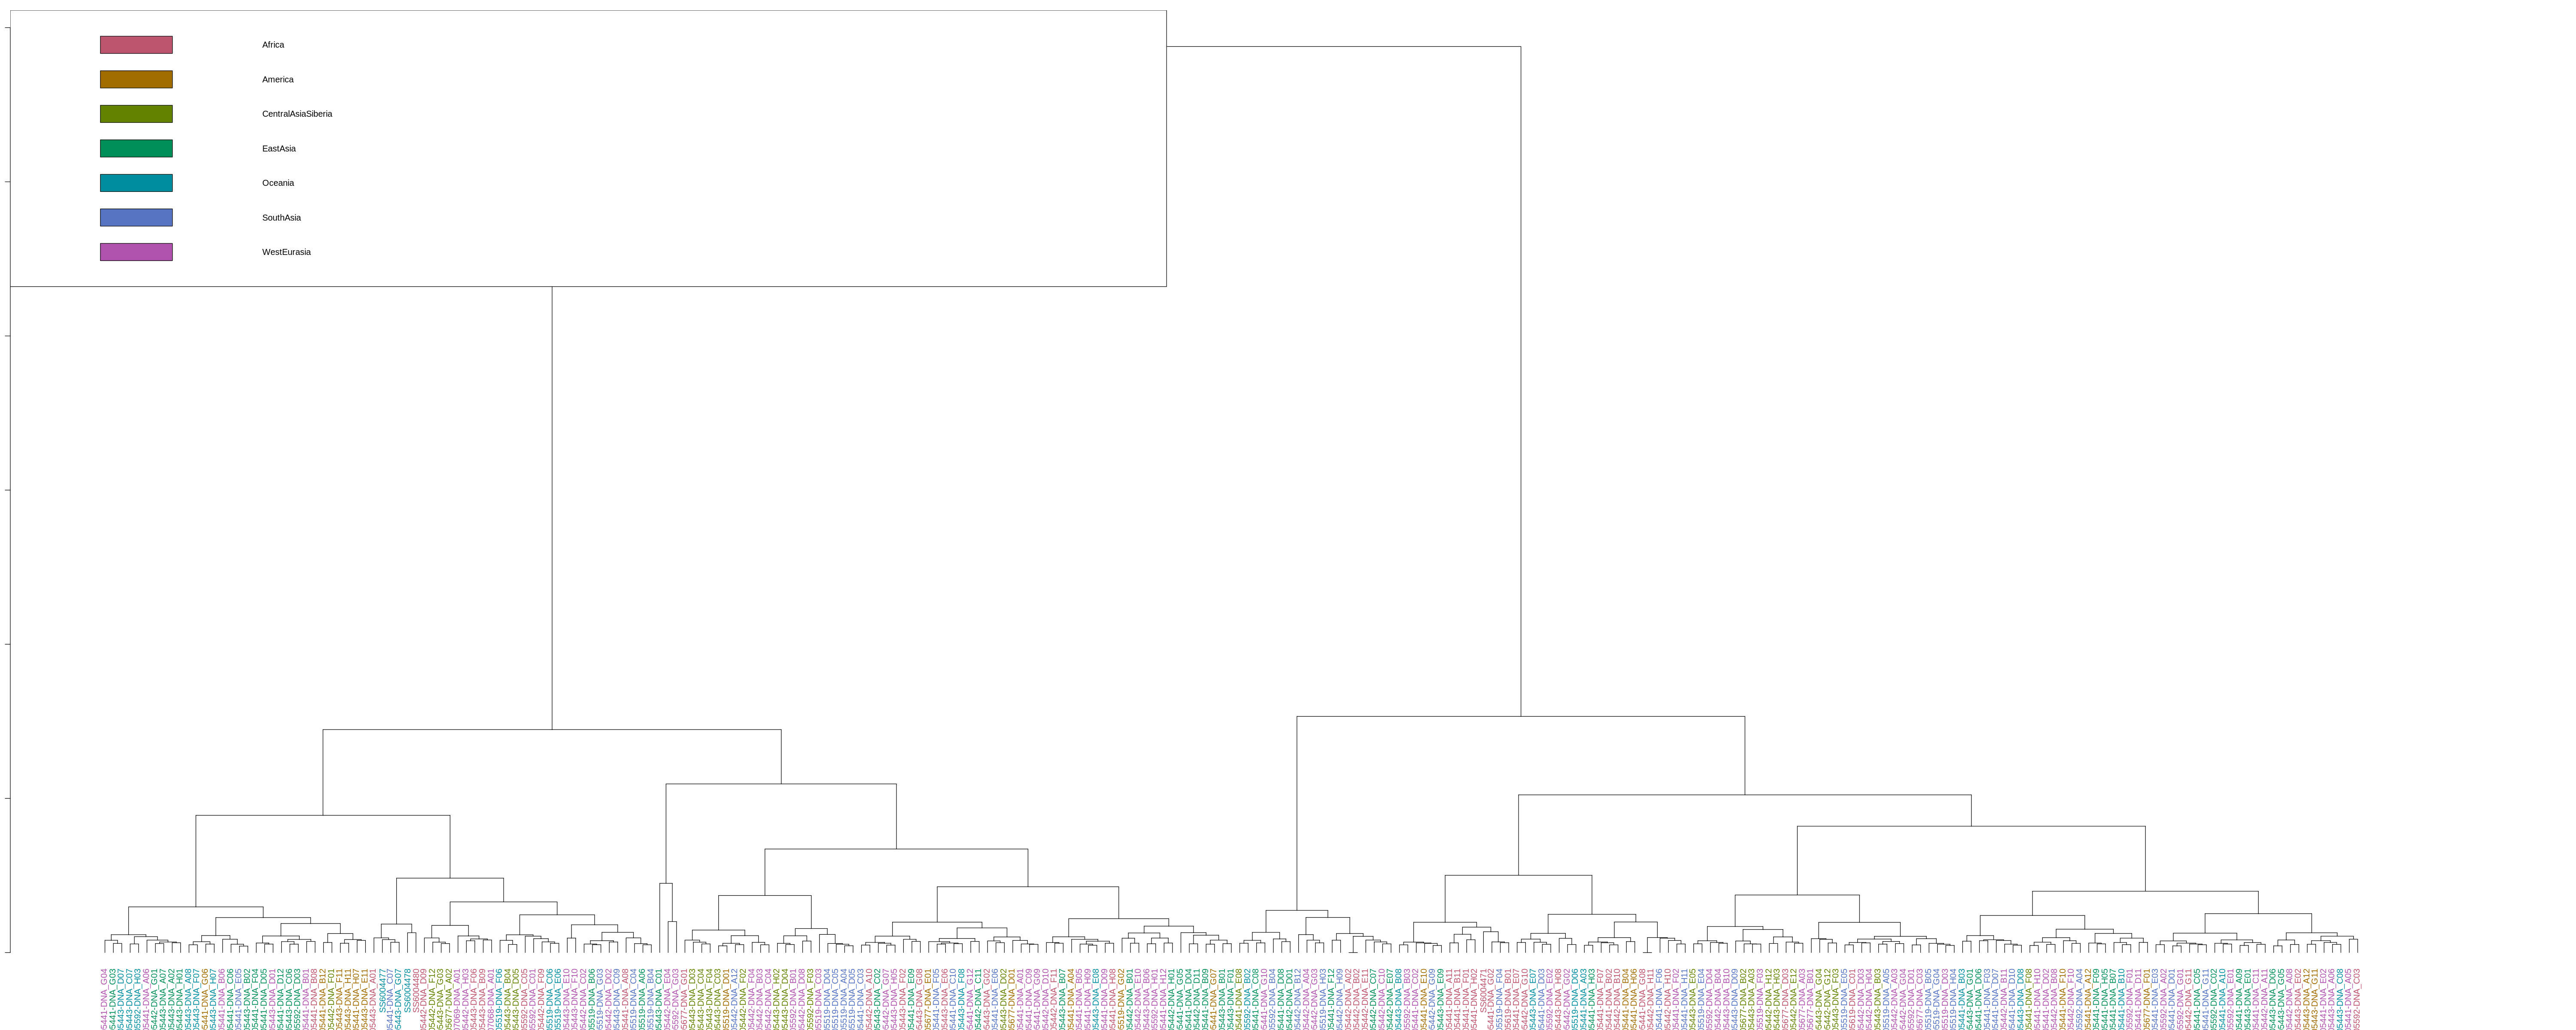

In [128]:
# Create a vector giving a color for each invidiual to which region it belongs to
# Change height/width to rescale your figure
options(repr.plot.width=50, repr.plot.height=20) ; par(oma=c(0,0,0,0))
type <- regions$Region
n_types <- length(unique(type))
cols_7 <- colorspace::rainbow_hcl(n_types, c = 70, l  = 50)
col_type <- cols_7[type]
# color labels by region
labels_colors(dend) <- col_type[order.dendrogram(dend)]
# color branches based on cutting the tree into 4 clusters:\n",
#dend <- color_branches(dend, k = 10)\n",
par(mar = c(4,1,1,12))
plot(dend)
#colored_bars(cbind(k234[,3:1], col_car_type), dend, rowLabels = c(paste0(\"k = \", 4:2), \"Car Type\"), horiz = TRUE)\n",
legend("topleft", legend = levels(type), fill = cols_7)

In [129]:
dend <- as.dendrogram(hclust(D,  method="ward.D"))
dend

'dendrogram' with 2 branches and 269 members total, at height 16762.07 

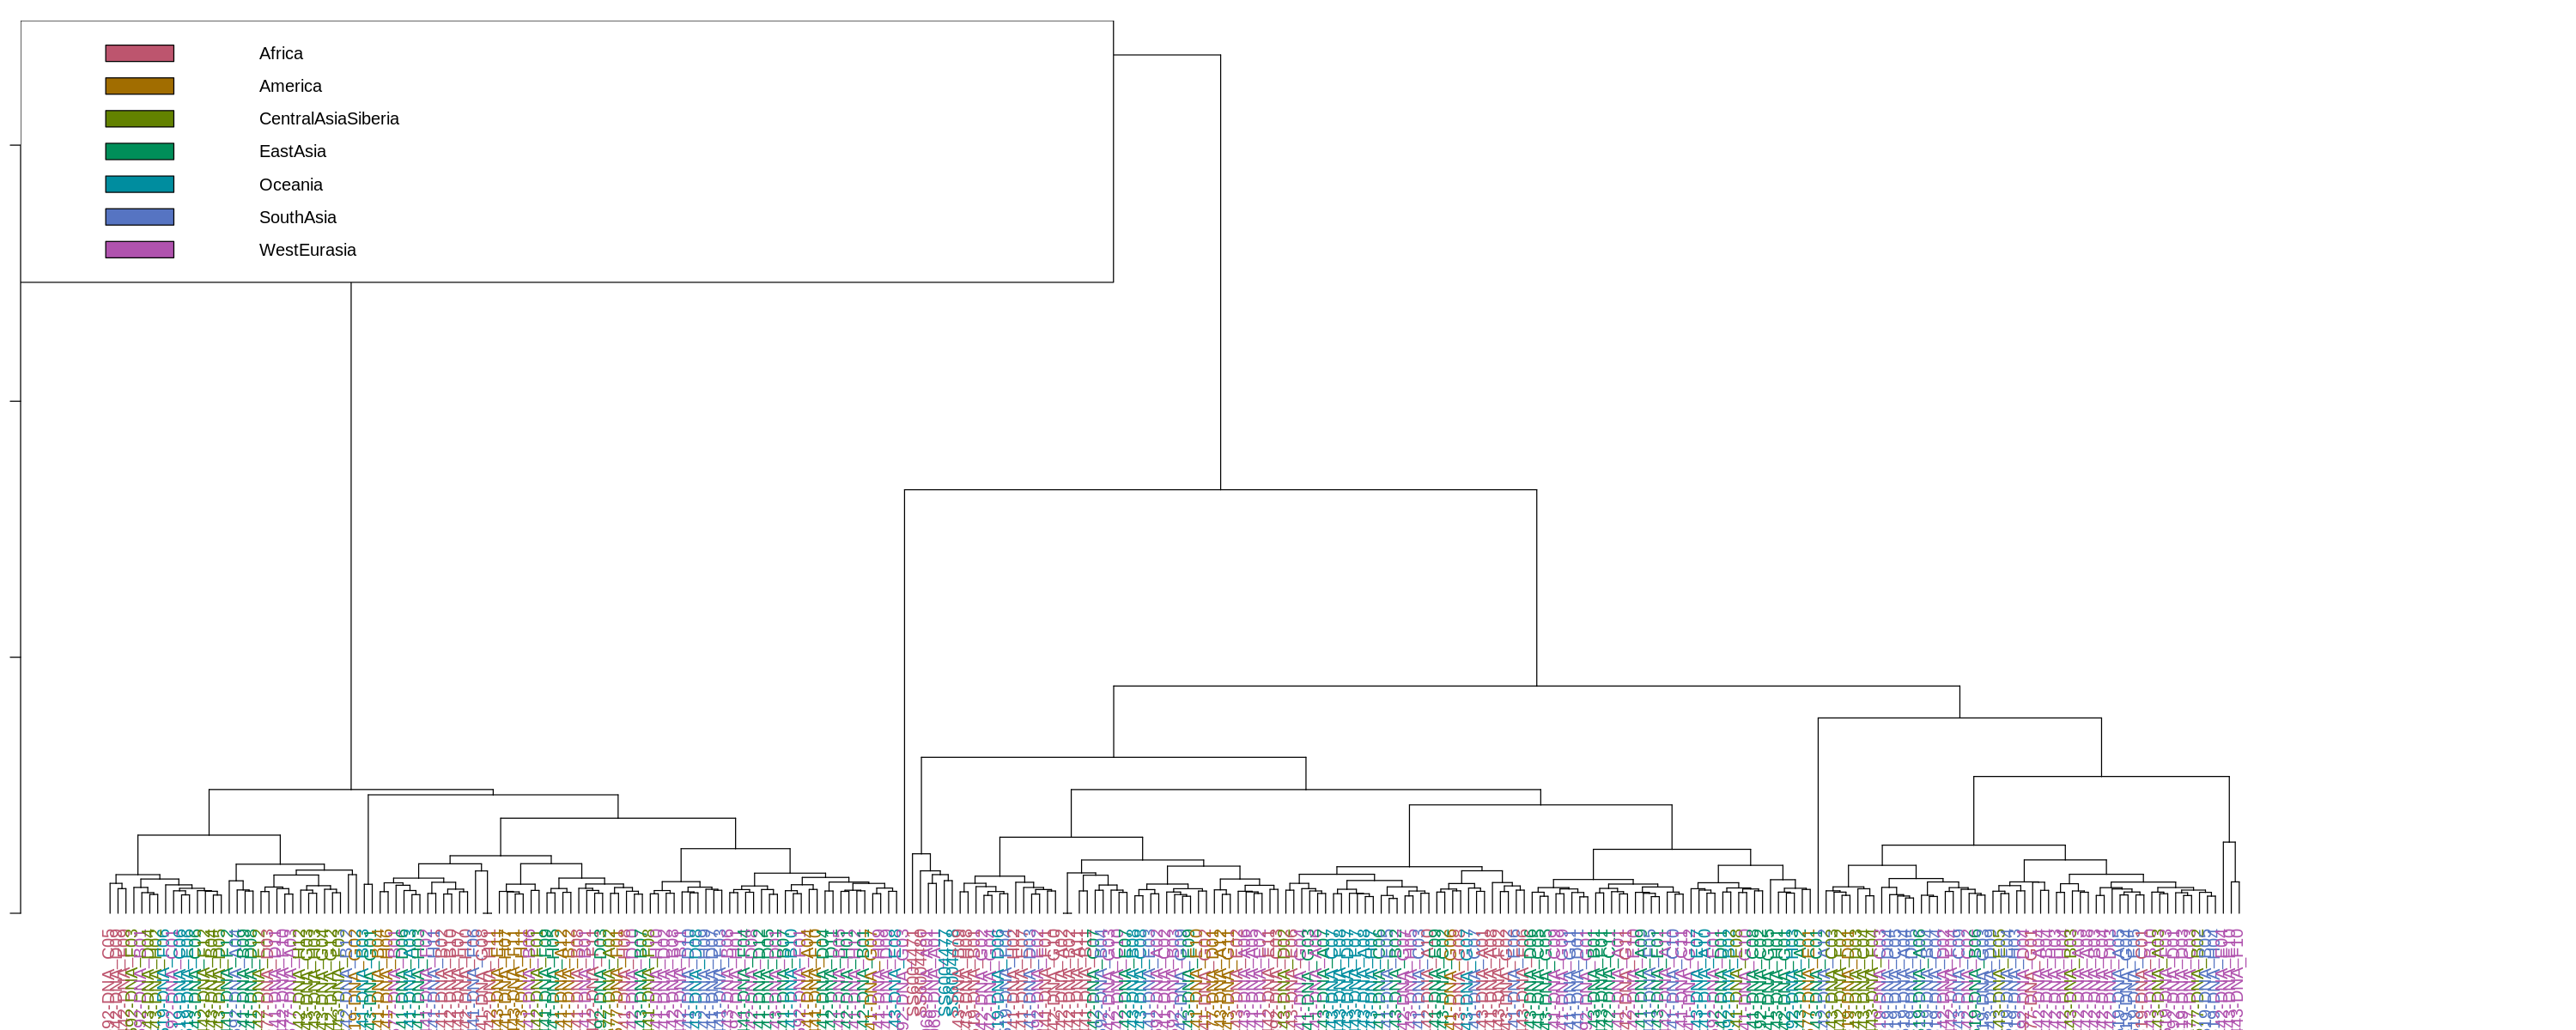

In [130]:
options(repr.plot.width=25, repr.plot.height=10) ; par(oma=c(0,0,0,0))
car_type <- regions$Region
n_car_types <- length(unique(car_type))
cols_7 <- colorspace::rainbow_hcl(n_car_types, c = 70, l  = 50)
col_car_type <- cols_7[car_type]
# color labels by car company
labels_colors(dend) <- col_car_type[order.dendrogram(dend)]
# color branches based on cutting the tree into 4 clusters:
#dend <- color_branches(dend, k = 10)\n",
par(mar = c(4,1,1,12))
plot(dend)
#colored_bars(cbind(k234[,3:1], col_car_type), dend, rowLabels = c(paste0(\"k = \", 4:2), \"Car Type\"), horiz = TRUE)\n",
legend("topleft", legend = levels(car_type), fill = cols_7)

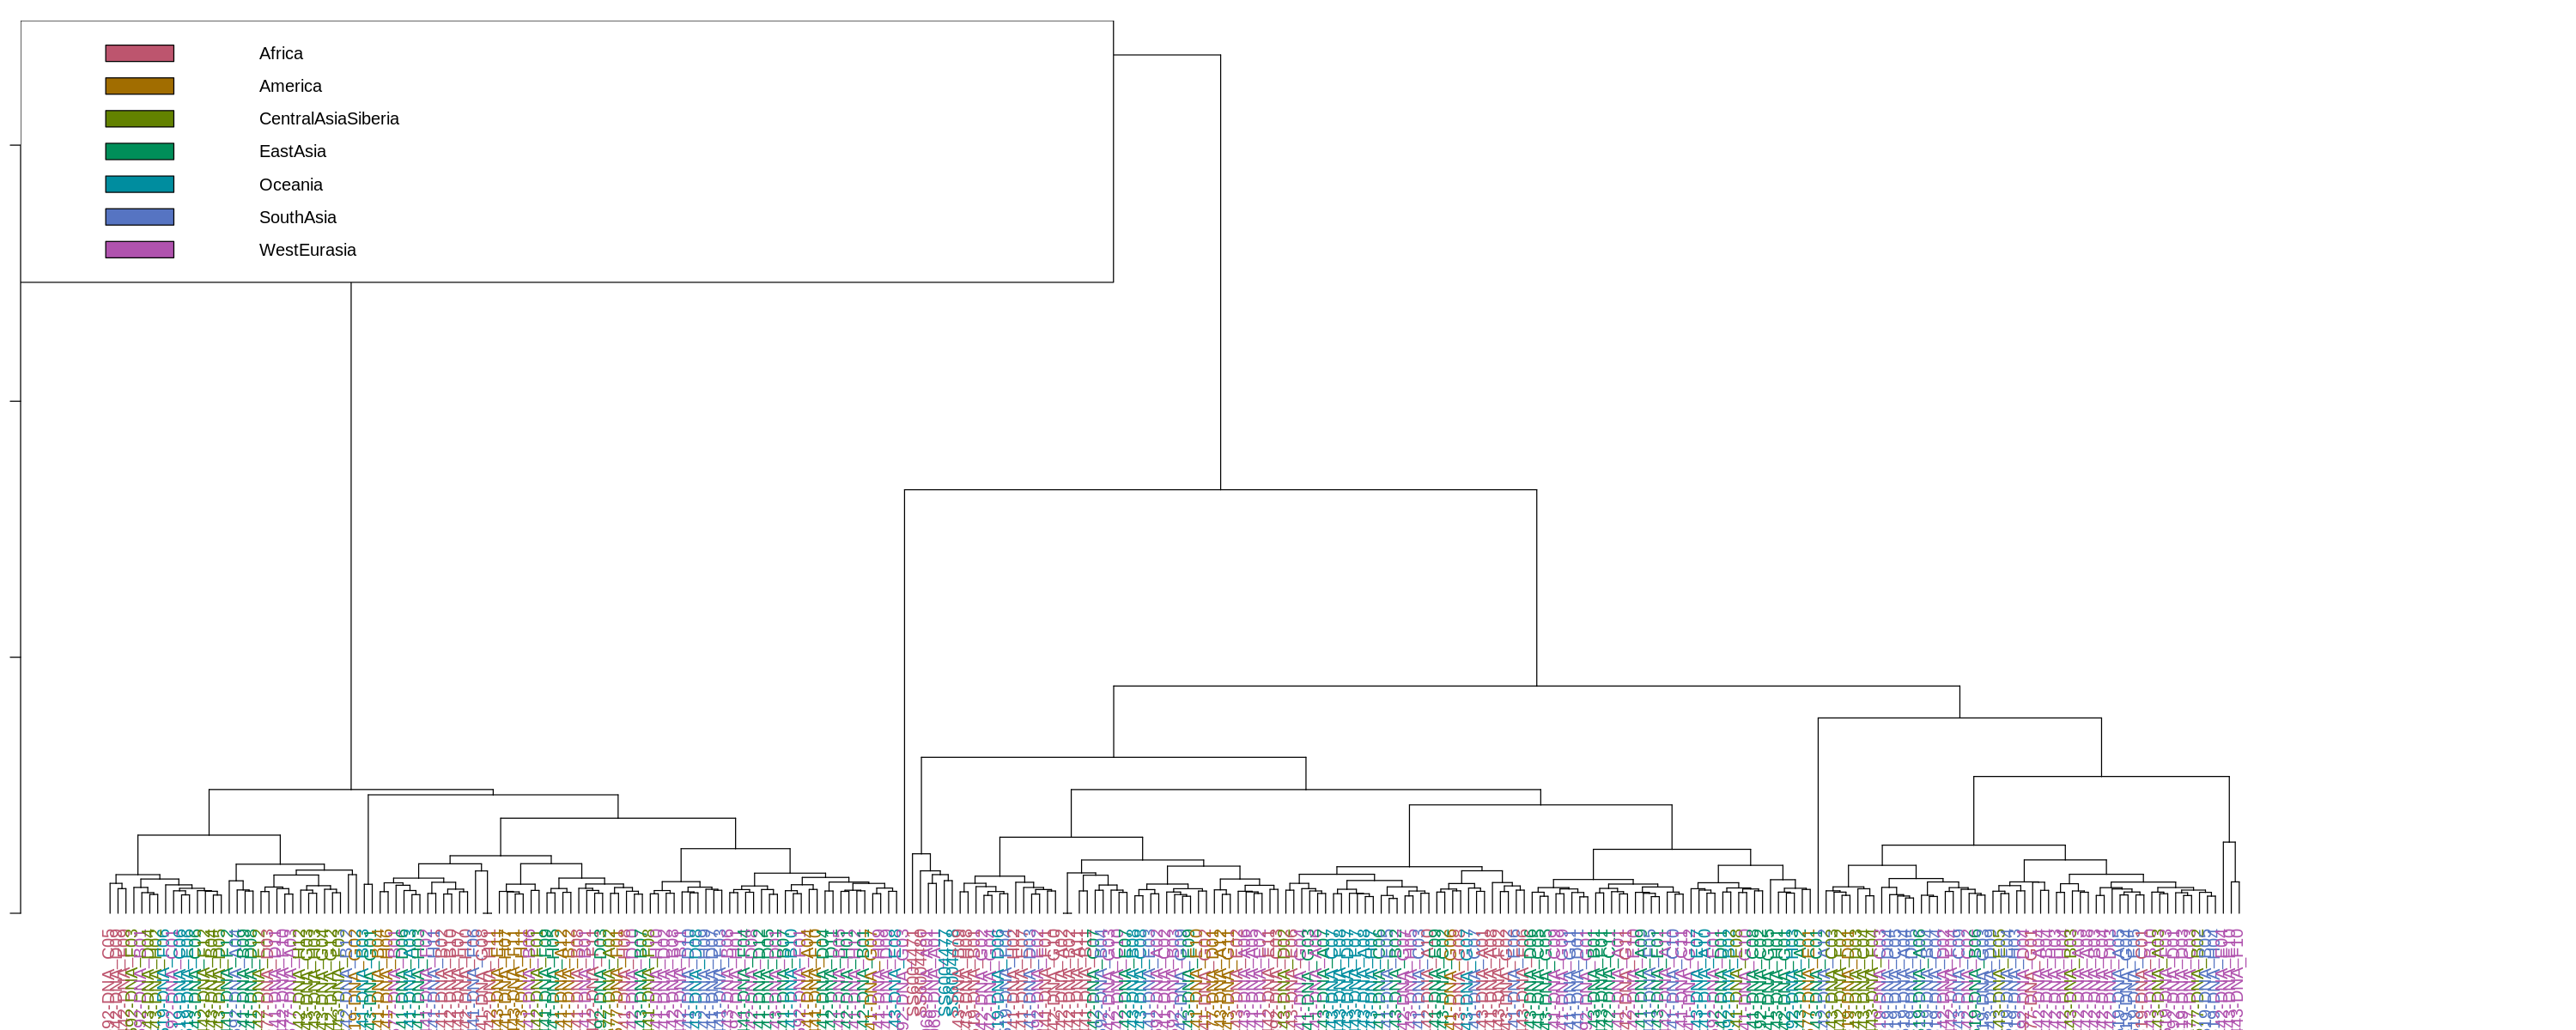

In [131]:
options(repr.plot.width=25, repr.plot.height=10) ; par(oma=c(0,0,0,0))
car_type <- regions$Region
n_car_types <- length(unique(car_type))
cols_7 <- colorspace::rainbow_hcl(n_car_types, c = 70, l  = 50)
col_car_type <- cols_7[car_type]
# color labels by car company
labels_colors(dend) <- col_car_type[order.dendrogram(dend)]
# color branches based on cutting the tree into 4 clusters:
#dend <- color_branches(dend, k = 10)\n",
par(mar = c(4,1,1,12))
plot(dend)
#colored_bars(cbind(k234[,3:1], col_car_type), dend, rowLabels = c(paste0(\"k = \", 4:2), \"Car Type\"), horiz = TRUE)\n",
legend("topleft", legend = levels(car_type), fill = cols_7)

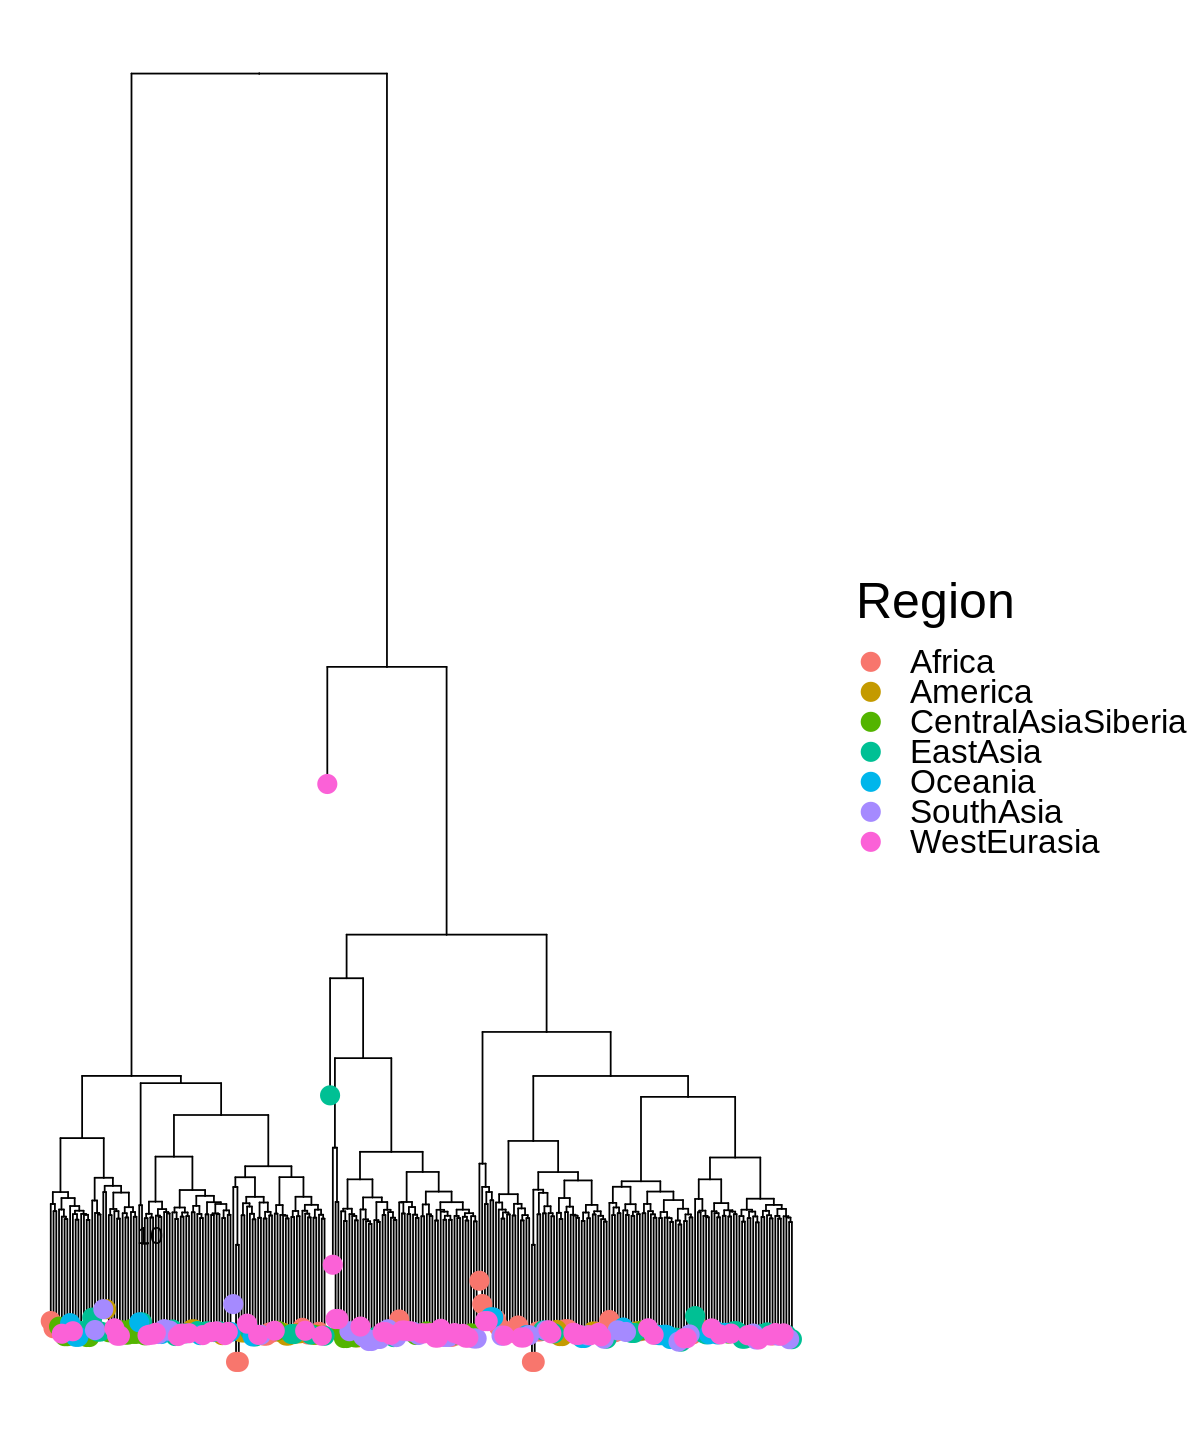

In [133]:
p1 <- ggtree(tre, layout="dendrogram") %<+% regions +  
geom_tippoint(aes(color=Region),  size=5) + # Colour code the tips with country\
# Adding in a scale
geom_treescale(x=0, y=35, fontsize=5, linesize=2, offset=2, width=10) +
theme(legend.title = element_text(size = 30), 
      legend.text = element_text(size = 20))
plot(p1)
#ggsave("../plots/ward_phylo_horiz.png", width = 25, height = 10)"

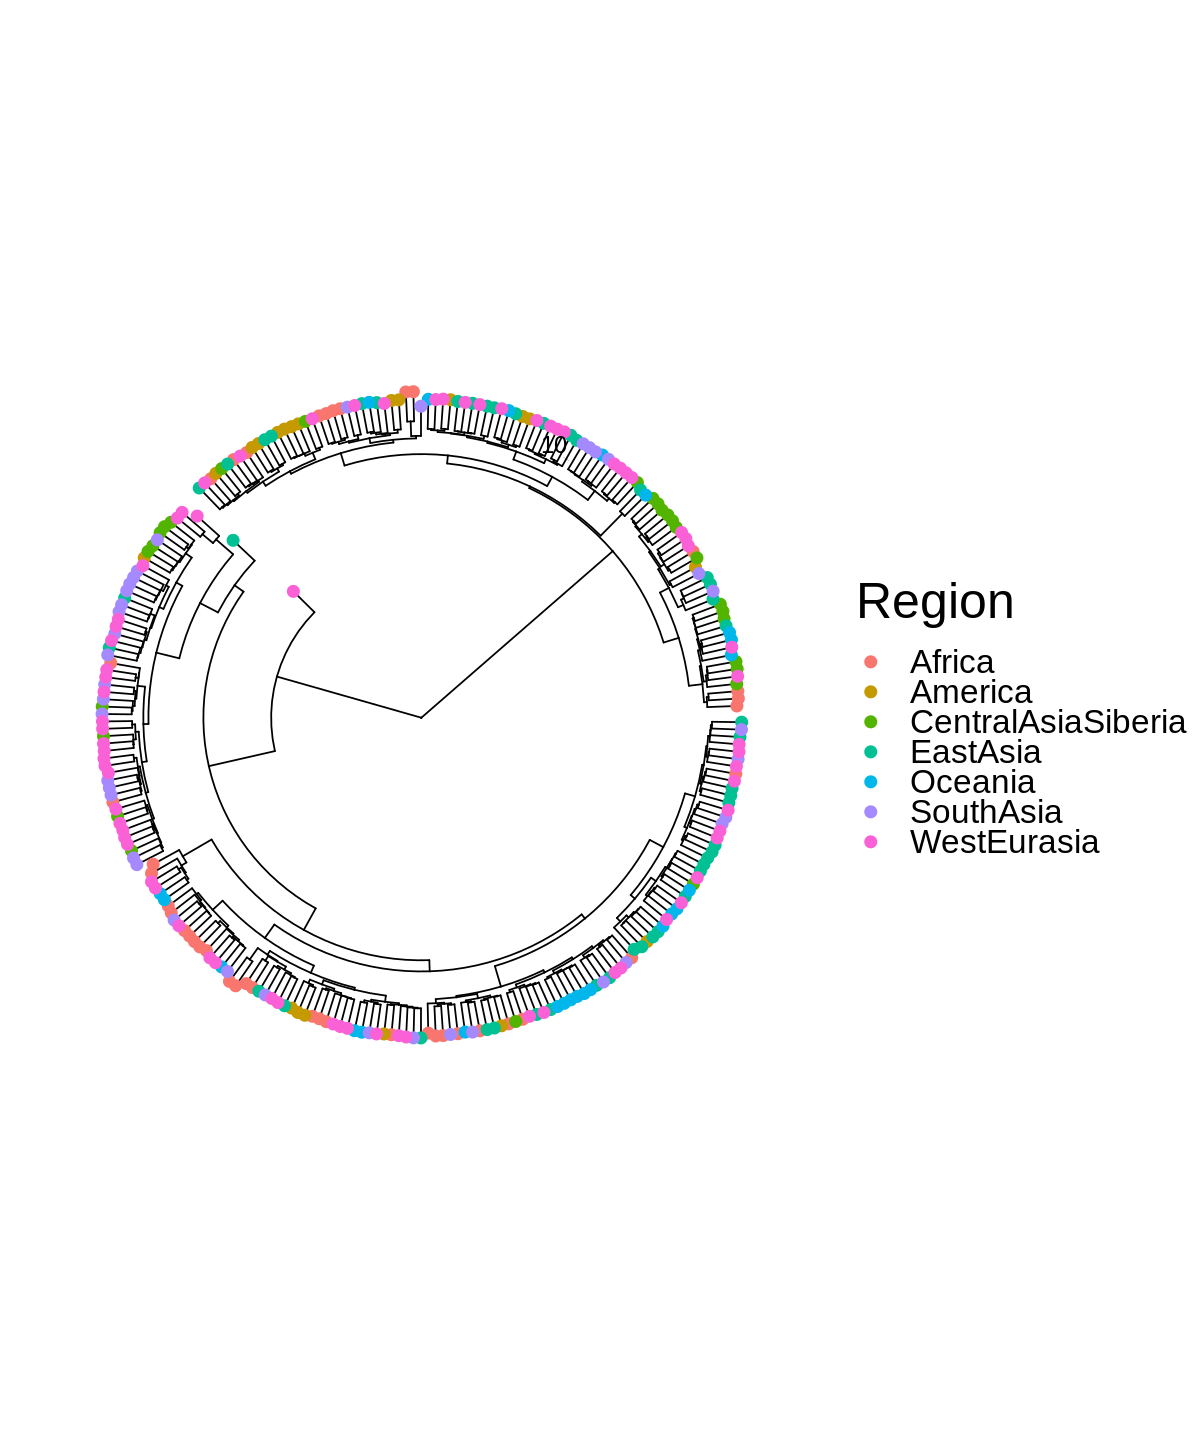

In [134]:
p1 <- ggtree(tre, layout="circular") %<+% regions + #geom_tiplab() +
geom_tippoint(aes(color=Region), size=3) + # Colour code the tips with country\n",
# Adding in a scale
geom_treescale(x=0, y=45, fontsize=5, linesize=2, offset=2, width=10)+
theme(legend.title = element_text(size = 30), 
      legend.text = element_text(size = 20))


plot(p1)
#ggsave("../plots/ward_phylo_circular.png", width = 25, height = 10)

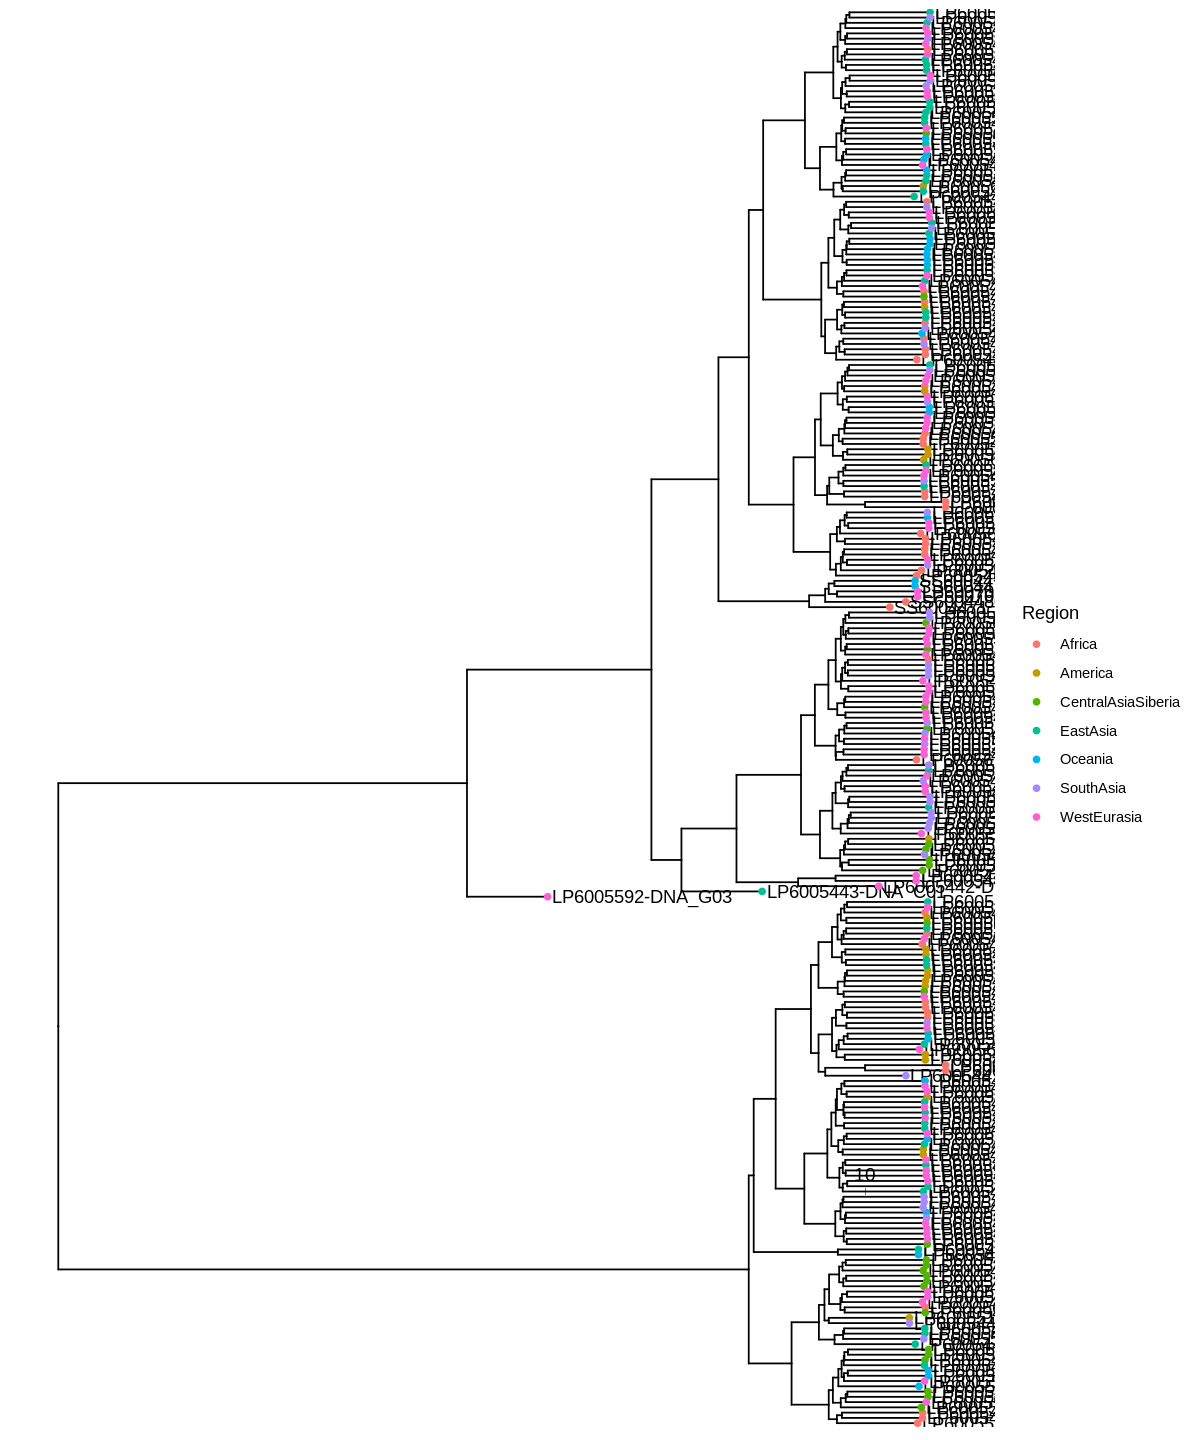

In [135]:
options(repr.plot.width=10, repr.plot.height=12) ; par(oma=c(0,0,0,0))
p1 <- ggtree(tre) %<+% regions + geom_tiplab() +
geom_tippoint(aes(color=Region)) + 
geom_treescale(x=0, y=45, fontsize=4, linesize=2, offset=2, width=10)
plot(p1)